SCRAPPING DATA USING BEAUTIFULSOUP AND REQUESTS  FROM THE WEBSITE- ***Top 100 YouTube Channels in India***

In [32]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
# Define the URL of the website from which you want to extract data
url = "https://vidiq.com/youtube-stats/top/country/in/"

# Use the requests library to make an HTTP GET request to the specified URL and retrieve the page's HTML content
source = requests.get(url).text
# Create a BeautifulSoup object to parse the HTML content using the 'lxml' parser
soup = BeautifulSoup(source, 'lxml')

print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   Top 100 YouTube Channels in India - vidIQ YouTube Stats
  </title>
  <meta content="Top 100 YouTube Channels in India - vidIQ YouTube Stats" property="og:title"/>
  <meta content="Track Top India YouTube Channels' Statistics and get AI-powered insights to boost your YouTube channel growth." name="description"/>
  <meta content="Track Top India YouTube Channels' Statistics and get AI-powered insights to boost your YouTube channel growth." property="og:description"/>
  <link as="image" href="/youtube-stats/images/logo-white.svg" rel="preload"/>
  <link as="image" href="/youtube-stats/images/search.svg" rel="preload"/>
  <link as="image" href="/youtube-stats/images/share.svg" rel="preload"/>
  <meta content="9" name="next-head-count"/>
  <link href="/favicons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/fav

In [33]:
#finding the table in the website
table=soup.find("table", class_="w-full min-w-[600px] lg:min-w-0")
print(table.prettify())

<table class="w-full min-w-[600px] lg:min-w-0">
 <thead>
  <tr>
   <style data-emotion="css xd87ek">
    .css-xd87ek{text-align:left;}
   </style>
   <th class="bg-vidiq-dark-400 px-3 py-1 text-sm font-medium selection:bg-transparent md:py-2 css-xd87ek">
    <div class="inline-flex items-center gap-2 cursor-pointer">
     <span>
      Rank
     </span>
     <svg fill="currentColor" height="1em" stroke="currentColor" stroke-width="0" viewbox="0 0 320 512" width="1em" xmlns="http://www.w3.org/2000/svg">
      <path d="M41 288h238c21.4 0 32.1 25.9 17 41L177 448c-9.4 9.4-24.6 9.4-33.9 0L24 329c-15.1-15.1-4.4-41 17-41zm255-105L177 64c-9.4-9.4-24.6-9.4-33.9 0L24 183c-15.1 15.1-4.4 41 17 41h238c21.4 0 32.1-25.9 17-41z">
      </path>
     </svg>
    </div>
   </th>
   <th class="bg-vidiq-dark-400 px-3 py-1 text-sm font-medium selection:bg-transparent md:py-2 css-xd87ek">
    <div class="inline-flex items-center gap-2 cursor-pointer">
     <span>
      Channel
     </span>
     <svg fill="curr

In [34]:
title=soup.find("thead")
if title:
  header_row = title.find("tr")
  header = [th.text.strip() for th in header_row.find_all("th")]
header

['Rank', 'Channel', 'Videos', 'Subscribers', 'Views']

GENERATING DATA IN TABULAR FORM

In [36]:
tbody = table.find("tbody")
data = []

if tbody:
    # Find all 'tr' (table row) elements within the 'tbody'
    rows = tbody.find_all("tr")

    # Loop through each 'tr' element to extract row data
    for row in rows:
        # Extract text from each 'td' (table data) element within the row and strip any leading/trailing whitespace
        row_data = [td.text.strip() for td in row.find_all("td")]

        # Append the extracted row data to the 'data' list
        data.append(row_data)

# Create a Pandas DataFrame using the extracted data and the previously defined 'header' (table header)
youtuber = pd.DataFrame(data, columns=header)
# Print the resulting DataFrame
youtuber

,Rank,Channel,Videos,Subscribers,Views
0,#1,T-Series,19.46K,249M,232.41B
1,#2,SET India,118.44K,162M,151.38B
2,#3,Zee Music Company,8.9K,99.3M,59.68B
3,#4,Goldmines,6.7K,89.3M,25.22B
4,#5,Sony SAB,73.16K,85.1M,103.69B
...,...,...,...,...,...
95,#96,And TV,39.61K,18.4M,16.6B
96,#97,Taarak Mehta Ka Ooltah Chashmah,5.27K,18M,12.1B
97,#98,News 24,235.53K,18M,8.7B
98,#99,Fun For Kids TV - Hindi Rhymes,159,18M,7.87B


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Videos'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_4, *['Subscribers'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['Views'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Videos'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Subscribers'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_8, *['Views'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_9, *[[['Videos', 'Subscribers'], ['Subscribers', 'Views']]], **{})
chart

In [37]:
# Function to convert strings like 'K', 'M', and 'B' to numeric values
def convert_to_numeric(value):
    if isinstance(value, str):  # Check if the value is a string
        if 'K' in value:
            return float(value.replace('K', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1000000
        elif 'B' in value:
            return float(value.replace('B', '')) * 1000000000
    return float(value)  # Convert non-string values to float

# Convert the 'Videos', 'Subscribers', and 'Views' columns to numeric
youtuber['Videos'] = youtuber['Videos'].apply(convert_to_numeric)
youtuber['Subscribers'] = youtuber['Subscribers'].apply(convert_to_numeric)
youtuber['Views'] = youtuber['Views'].apply(convert_to_numeric)

# Display the modified DataFrame
print(youtuber)

    Rank                          Channel    Videos  Subscribers         Views
0     #1                         T-Series   19460.0  249000000.0  2.324100e+11
1     #2                        SET India  118440.0  162000000.0  1.513800e+11
2     #3                Zee Music Company    8900.0   99300000.0  5.968000e+10
3     #4                        Goldmines    6700.0   89300000.0  2.522000e+10
4     #5                         Sony SAB   73160.0   85100000.0  1.036900e+11
..   ...                              ...       ...          ...           ...
95   #96                           And TV   39610.0   18400000.0  1.660000e+10
96   #97  Taarak Mehta Ka Ooltah Chashmah    5270.0   18000000.0  1.210000e+10
97   #98                          News 24  235530.0   18000000.0  8.700000e+09
98   #99   Fun For Kids TV - Hindi Rhymes     159.0   18000000.0  7.870000e+09
99  #100    Pokémon Asia Official (Hindi)     214.0   18000000.0  9.849400e+08

[100 rows x 5 columns]


GRAPHICAL REPRESENTATION OF DATA OF VIDEOS, SUBSCRIBERS, VIEWS

In [38]:
# Function to convert strings like 'K', 'M', and 'B' to numeric values
def convert_to_numeric(value):
    if isinstance(value, str):  # Check if the value is a string
        if 'K' in value:
            return float(value.replace('K', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1000000
        elif 'B' in value:
            return float(value.replace('B', '')) * 1000000000
    return float(value)  # Convert non-string values to float

# Convert the 'Videos', 'Subscribers', and 'Views' columns to numeric
youtuber['Videos'] = youtuber['Videos'].apply(convert_to_numeric)
youtuber['Subscribers'] = youtuber['Subscribers'].apply(convert_to_numeric)
youtuber['Views'] = youtuber['Views'].apply(convert_to_numeric)

# Display the modified DataFrame
youtuber

,Rank,Channel,Videos,Subscribers,Views
0,#1,T-Series,19460.0,249000000.0,2.324100e+11
1,#2,SET India,118440.0,162000000.0,1.513800e+11
2,#3,Zee Music Company,8900.0,99300000.0,5.968000e+10
3,#4,Goldmines,6700.0,89300000.0,2.522000e+10
4,#5,Sony SAB,73160.0,85100000.0,1.036900e+11
...,...,...,...,...,...
95,#96,And TV,39610.0,18400000.0,1.660000e+10
96,#97,Taarak Mehta Ka Ooltah Chashmah,5270.0,18000000.0,1.210000e+10
97,#98,News 24,235530.0,18000000.0,8.700000e+09
98,#99,Fun For Kids TV - Hindi Rhymes,159.0,18000000.0,7.870000e+09


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['Videos'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_11, *['Subscribers'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['Views'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_13, *['Videos'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_14, *['Subscribers'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_15, *['Views'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_16, *[[['Videos', 'Subscribers'], ['Subscribers', 'Views']]], **{})
chart

In [39]:
print(youtuber.describe())

              Videos   Subscribers         Views
count     100.000000  1.000000e+02  1.000000e+02
mean    28765.750000  3.649900e+07  1.979057e+10
std     65941.597645  3.002954e+07  2.989978e+10
min        67.000000  1.800000e+07  3.517800e+08
25%       594.750000  2.172500e+07  7.342500e+09
50%      3660.000000  2.840000e+07  1.178000e+10
75%     10140.000000  3.687500e+07  2.171750e+10
max    313720.000000  2.490000e+08  2.324100e+11


CENTRAL TENDENCY OF VIDEOS, SUBSCRIBERS, VIEWS

In [40]:
import pandas as pd

# Assuming you have a DataFrame named 'youtuber' with the specified columns

# Function to convert strings like 'K' to thousands and 'M' to millions
def convert_to_numeric(value):
    if isinstance(value, str):  # Check if the value is a string
        if 'K' in value:
            return float(value.replace('K', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1000000
    return float(value)  # Convert non-string values to float

# Convert the numeric columns to numeric
youtuber['Videos'] = youtuber['Videos'].apply(convert_to_numeric)
youtuber['Subscribers'] = youtuber['Subscribers'].apply(convert_to_numeric)
youtuber['Views'] = youtuber['Views'].apply(convert_to_numeric)

# Calculate mean, median, and standard deviation
mean_values = youtuber[['Videos', 'Subscribers', 'Views']].mean()
median_values = youtuber[['Videos', 'Subscribers', 'Views']].median()
std_deviation = youtuber[['Videos', 'Subscribers', 'Views']].std()

# Create a summary DataFrame
summary_df = pd.DataFrame({'Mean': mean_values, 'Median': median_values, 'Std Deviation': std_deviation})

# Print the summary DataFrame
print(summary_df)


                     Mean        Median  Std Deviation
Videos       2.876575e+04  3.660000e+03   6.594160e+04
Subscribers  3.649900e+07  2.840000e+07   3.002954e+07
Views        1.979057e+10  1.178000e+10   2.989978e+10


VARIANCE OF VIDEOS, SUBSCRIBERS, VIEWS

In [41]:
# Calculate the variance of 'Videos', 'Subscribers', and 'Views'
variance_videos = youtuber['Videos'].var()
variance_subscribers = youtuber['Subscribers'].var()
variance_views = youtuber['Views'].var()

# Print the variances
print("Variance of Videos:", variance_videos)
print("Variance of Subscribers:", variance_subscribers)
print("Variance of Views:", variance_views)

Variance of Videos: 4348294299.987373
Variance of Subscribers: 901773029292929.2
Variance of Views: 8.9399670955758e+20


STATISTICAL ANALYSIS OF THE DATA- *CORRELATION*

In [58]:
# Calculate the correlation matrix
correlation_matrix = youtuber.corr()

# Print the correlation matrix
print(correlation_matrix)

               Videos  Subscribers     Views
Videos       1.000000     0.117044  0.162592
Subscribers  0.117044     1.000000  0.940893
Views        0.162592     0.940893  1.000000


<ipython-input-58-d0d817984194>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = youtuber.corr()


5 TOP SUBSCRIBED AND 5 LEAST SUBSCRIBED YOUTUBE CHANNELS

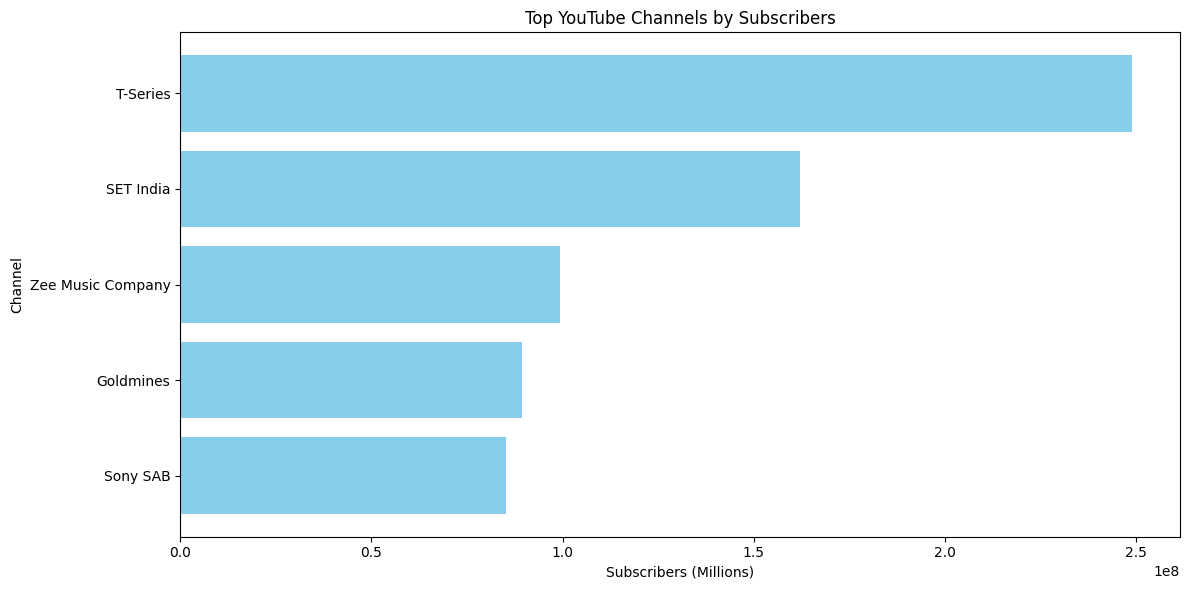

In [42]:
# Sort the DataFrame by the 'Subscribers' column in descending order
youtuber_sorted = youtuber.sort_values(by='Subscribers', ascending=False)

# Select the top N channels for visualization (e.g., top 5)
top_N = 5
top_youtubers = youtuber_sorted.head(top_N)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_youtubers['Channel'], top_youtubers['Subscribers'], color='skyblue')
plt.xlabel('Subscribers (Millions)')
plt.ylabel('Channel')
plt.title('Top YouTube Channels by Subscribers')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest subscribers at the top
plt.tight_layout()

# Show the plot
plt.show()


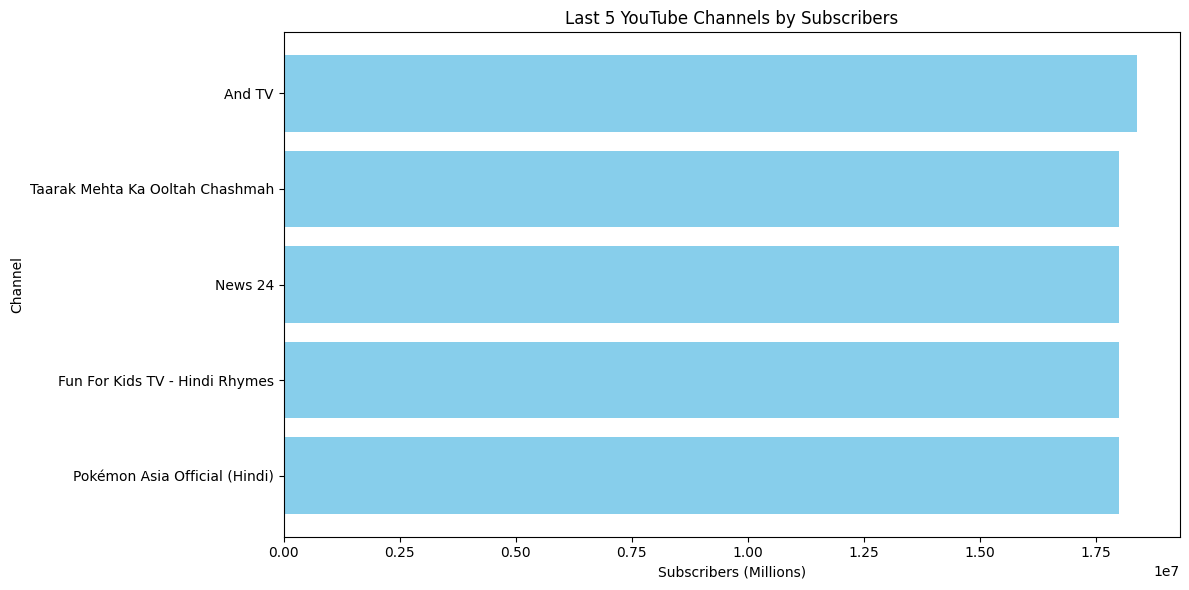

In [43]:
# Sort the DataFrame by the 'Subscribers' column in descending order (highest subscribers first)
youtuber_sorted = youtuber.sort_values(by='Subscribers', ascending=False)

# Select the last N channels for visualization (e.g., last 5)
last_N = 5
last_youtubers = youtuber_sorted.tail(last_N)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(last_youtubers['Channel'], last_youtubers['Subscribers'], color='skyblue')
plt.xlabel('Subscribers (Millions)')
plt.ylabel('Channel')
plt.title('Last 5 YouTube Channels by Subscribers')
plt.gca().invert_yaxis()  # Invert the y-axis to show the lowest subscribers at the top
plt.tight_layout()

# Show the plot
plt.show()


TIME SERIES ANALYSIS OF SUBSCRIBERS OVER TIME

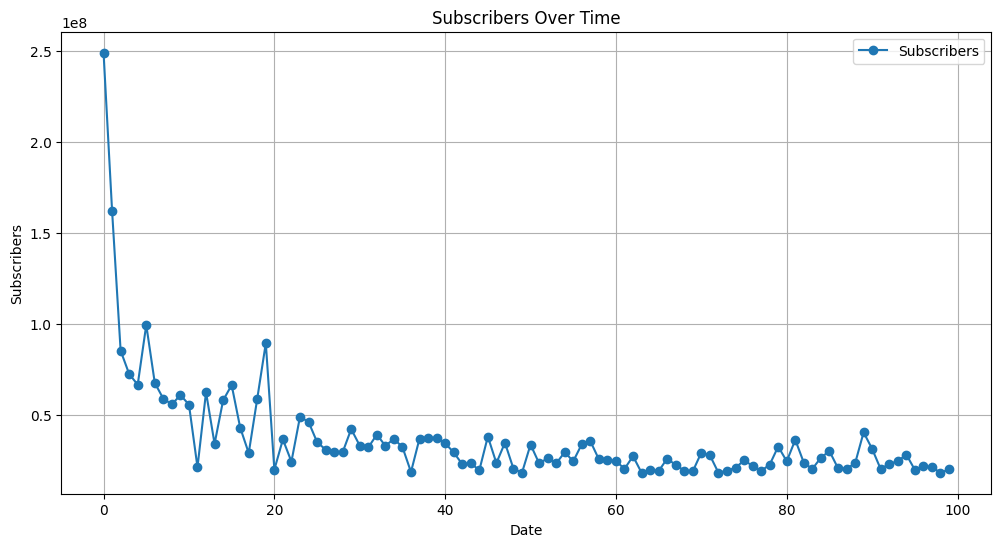

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'youtuber' with datetime index and relevant columns

# Visualize time series data (e.g., 'Subscribers' over time)
plt.figure(figsize=(12, 6))
plt.plot(youtuber.index, youtuber['Subscribers'], label='Subscribers', marker='o', linestyle='-')
plt.title('Subscribers Over Time')
plt.xlabel('Date')
plt.ylabel('Subscribers')
plt.grid(True)
plt.legend()
plt.show()

STATISTICAL ANALYSIS OF THE DATA- *DESCRIPTIVE*

In [60]:
import pandas as pd
from scipy import stats

# Assuming you have a DataFrame named 'youtuber'

# Descriptive Statistics
# Calculate summary statistics for numeric columns
summary_stats = youtuber[['Subscribers', 'Views', 'Videos']].describe()
print("Descriptive Statistics:")
print(summary_stats)

# Hypothesis Testing
# Perform a one-sample t-test to test if the mean of 'Subscribers' is significantly different from a certain value
null_hypothesis_value = 1000000  # Replace with the value you want to test
t_stat, p_value = stats.ttest_1samp(youtuber['Subscribers'], null_hypothesis_value)

alpha = 0.05  # Significance level

if p_value < alpha:
    print(f"Reject the null hypothesis: The mean 'Subscribers' is significantly different from {null_hypothesis_value}.")
else:
    print(f"Fail to reject the null hypothesis: The mean 'Subscribers' is not significantly different from {null_hypothesis_value}.")


Descriptive Statistics:
        Subscribers         Views         Videos
count  1.000000e+02  1.000000e+02     100.000000
mean   3.649900e+07  1.979057e+10   28765.750000
std    3.002954e+07  2.989978e+10   65941.597645
min    1.800000e+07  3.517800e+08      67.000000
25%    2.172500e+07  7.342500e+09     594.750000
50%    2.840000e+07  1.178000e+10    3660.000000
75%    3.687500e+07  2.171750e+10   10140.000000
max    2.490000e+08  2.324100e+11  313720.000000
Reject the null hypothesis: The mean 'Subscribers' is significantly different from 1000000.

Correlation Matrix:
             Subscribers     Views    Videos
Subscribers     1.000000  0.940893  0.117044
Views           0.940893  1.000000  0.162592
Videos          0.117044  0.162592  1.000000


SORT BY VIDEOS

In [44]:
# Sort the DataFrame by 'Videos' column in descending order
youtuber = youtuber.sort_values(by='Videos', ascending=False)

# Reset the index after sorting
youtuber = youtuber.reset_index(drop=True)

# Display the sorted DataFrame
print(youtuber)

   Rank                  Channel    Videos  Subscribers         Views
0   #23                 ABP NEWS  313720.0   37900000.0  1.363000e+10
1   #12                  Aaj Tak  298460.0   58800000.0  2.619000e+10
2   #27                  IndiaTV  278590.0   36600000.0  1.685000e+10
3   #98                  News 24  235530.0   18000000.0  8.700000e+09
4   #95             News18 India  191890.0   18800000.0  8.020000e+09
..  ...                      ...       ...          ...           ...
95  #44  ashish chanchlani vines     151.0   29900000.0  4.510000e+09
96  #35       Desi Music Factory     130.0   33700000.0  1.026000e+10
97  #75         Sidhu Moose Wala     114.0   21800000.0  6.490000e+09
98  #63             Amit Bhadana     101.0   24300000.0  2.390000e+09
99  #42               Round2hell      67.0   31100000.0  3.190000e+09

[100 rows x 5 columns]


In [45]:
# Sort the DataFrame by 'Videos' column in descending order
youtuber = youtuber.sort_values(by='Videos', ascending=True)

# Reset the index after sorting
youtuber = youtuber.reset_index(drop=True)

# Display the sorted DataFrame
print(youtuber)


   Rank                  Channel    Videos  Subscribers         Views
0   #42               Round2hell      67.0   31100000.0  3.190000e+09
1   #63             Amit Bhadana     101.0   24300000.0  2.390000e+09
2   #75         Sidhu Moose Wala     114.0   21800000.0  6.490000e+09
3   #35       Desi Music Factory     130.0   33700000.0  1.026000e+10
4   #44  ashish chanchlani vines     151.0   29900000.0  4.510000e+09
..  ...                      ...       ...          ...           ...
95  #95             News18 India  191890.0   18800000.0  8.020000e+09
96  #98                  News 24  235530.0   18000000.0  8.700000e+09
97  #27                  IndiaTV  278590.0   36600000.0  1.685000e+10
98  #12                  Aaj Tak  298460.0   58800000.0  2.619000e+10
99  #23                 ABP NEWS  313720.0   37900000.0  1.363000e+10

[100 rows x 5 columns]


SORT BY SUBSCRIBERS

In [46]:
# Sort the DataFrame by 'Subscribers' column in descending order
youtuber = youtuber.sort_values(by='Subscribers', ascending=False)

# Reset the index after sorting
youtuber = youtuber.reset_index(drop=True)

# Display the sorted DataFrame
print(youtuber)


    Rank                          Channel    Videos  Subscribers         Views
0     #1                         T-Series   19460.0  249000000.0  2.324100e+11
1     #2                        SET India  118440.0  162000000.0  1.513800e+11
2     #3                Zee Music Company    8900.0   99300000.0  5.968000e+10
3     #4                        Goldmines    6700.0   89300000.0  2.522000e+10
4     #5                         Sony SAB   73160.0   85100000.0  1.036900e+11
..   ...                              ...       ...          ...           ...
95   #96                           And TV   39610.0   18400000.0  1.660000e+10
96  #100    Pokémon Asia Official (Hindi)     214.0   18000000.0  9.849400e+08
97   #99   Fun For Kids TV - Hindi Rhymes     159.0   18000000.0  7.870000e+09
98   #98                          News 24  235530.0   18000000.0  8.700000e+09
99   #97  Taarak Mehta Ka Ooltah Chashmah    5270.0   18000000.0  1.210000e+10

[100 rows x 5 columns]


In [47]:
# Sort the DataFrame by 'Subscribers' column in ascending order
youtuber = youtuber.sort_values(by='Subscribers', ascending=True)

# Reset the index after sorting
youtuber = youtuber.reset_index(drop=True)

# Display the sorted DataFrame
print(youtuber)

    Rank                          Channel    Videos  Subscribers         Views
0    #97  Taarak Mehta Ka Ooltah Chashmah    5270.0   18000000.0  1.210000e+10
1   #100    Pokémon Asia Official (Hindi)     214.0   18000000.0  9.849400e+08
2    #98                          News 24  235530.0   18000000.0  8.700000e+09
3    #99   Fun For Kids TV - Hindi Rhymes     159.0   18000000.0  7.870000e+09
4    #96                           And TV   39610.0   18400000.0  1.660000e+10
..   ...                              ...       ...          ...           ...
95    #5                         Sony SAB   73160.0   85100000.0  1.036900e+11
96    #4                        Goldmines    6700.0   89300000.0  2.522000e+10
97    #3                Zee Music Company    8900.0   99300000.0  5.968000e+10
98    #2                        SET India  118440.0  162000000.0  1.513800e+11
99    #1                         T-Series   19460.0  249000000.0  2.324100e+11

[100 rows x 5 columns]


SORT BY VIEWS

In [48]:
# Sort the DataFrame by 'Views' column in ascending order
youtuber = youtuber.sort_values(by='Views', ascending=True)

# Reset the index after sorting
youtuber = youtuber.reset_index(drop=True)

# Display the sorted DataFrame
print(youtuber)

    Rank                                 Channel    Videos  Subscribers  \
0    #86                          Manoj  parihar     393.0   19800000.0   
1   #100           Pokémon Asia Official (Hindi)     214.0   18000000.0   
2    #77  Dr. Vivek Bindra: Motivational Speaker     930.0   21100000.0   
3    #76                 Khan GS Research Centre     362.0   21500000.0   
4    #88                                DLS News    4890.0   19600000.0   
..   ...                                     ...       ...          ...   
95    #8                               Colors TV  115870.0   66400000.0   
96    #6                                  Zee TV  134070.0   72300000.0   
97    #5                                Sony SAB   73160.0   85100000.0   
98    #2                               SET India  118440.0  162000000.0   
99    #1                                T-Series   19460.0  249000000.0   

           Views  
0   3.517800e+08  
1   9.849400e+08  
2   1.750000e+09  
3   2.130000e+09  
4   

In [49]:
# Sort the DataFrame by 'Views' column in ascending order
youtuber = youtuber.sort_values(by='Views', ascending=False)

# Reset the index after sorting
youtuber = youtuber.reset_index(drop=True)

# Display the sorted DataFrame
print(youtuber)

    Rank                                 Channel    Videos  Subscribers  \
0     #1                                T-Series   19460.0  249000000.0   
1     #2                               SET India  118440.0  162000000.0   
2     #5                                Sony SAB   73160.0   85100000.0   
3     #6                                  Zee TV  134070.0   72300000.0   
4     #8                               Colors TV  115870.0   66400000.0   
..   ...                                     ...       ...          ...   
95   #88                                DLS News    4890.0   19600000.0   
96   #76                 Khan GS Research Centre     362.0   21500000.0   
97   #77  Dr. Vivek Bindra: Motivational Speaker     930.0   21100000.0   
98  #100           Pokémon Asia Official (Hindi)     214.0   18000000.0   
99   #86                          Manoj  parihar     393.0   19800000.0   

           Views  
0   2.324100e+11  
1   1.513800e+11  
2   1.036900e+11  
3   7.623000e+10  
4   

TOTAL NUMBER OF SUBSCRIBERS

In [50]:
# Calculate the total subscribers
total_subscribers = youtuber['Subscribers'].sum()

# Print the total subscribers
print("Total Subscribers:", total_subscribers)

Total Subscribers: 3649900000.0


TOTAL NUMBER OF VIDEOS

In [51]:
# Calculate the total videos
total_videos = youtuber['Videos'].sum()

# Print the total videos
print("Total Videos:", total_videos)

Total Videos: 2876575.0


TOTAL NUMBER OF  VIEWS

In [52]:
# Calculate the total views
total_views = youtuber['Views'].sum()

# Print the total views
print("Total Views:", total_views)

Total Views: 1979056720000.0


DATA VISUALISATION

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2348 (\N{DEVANAGARI LETTER BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2330 (\N{DEVANAGARI LETTER CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

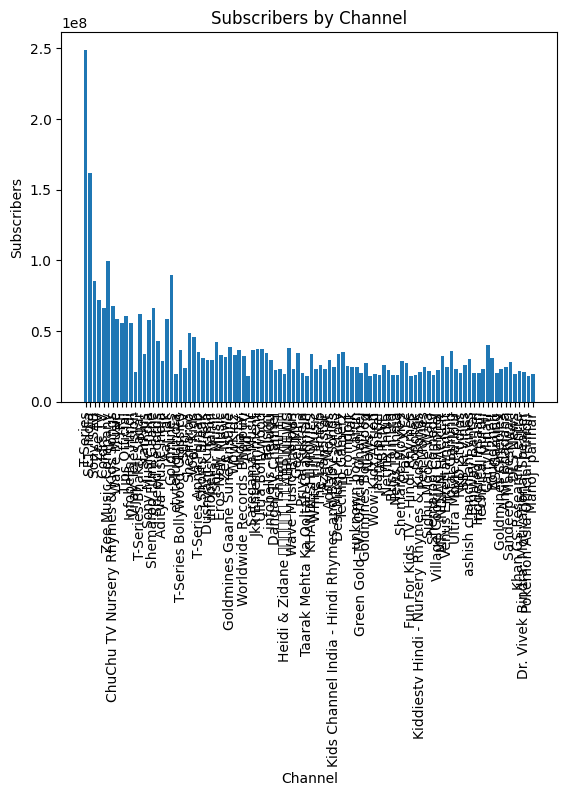

In [54]:
import matplotlib.pyplot as plt
plt.bar(youtuber['Channel'], youtuber['Subscribers'])
plt.xlabel('Channel')
plt.ylabel('Subscribers')
plt.title('Subscribers by Channel')
plt.xticks(rotation=90)
plt.show()